# <center> Heart Attack Risk Analysis  - [Voting & Stacking] Heart Attack Risk Predict📈 </center>
## <center>If you feel my notebook helpful, support with one upvote, thank you👍</center>
## <center>Created by Mr.Tao  24/10/2023👍</center>

# Table of Contents
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Read Dataset](#2)
- [3. Features Data Visualization](#3)
- [4. Preprocessing](#4)
- [5. Target distribution](#5)
- [6. Feature engineering](#6)
- [7. Split Dataset](#7)
- [8. Modeling](#8)  
- [9. StackingClassifier](#9) 
- [10. VotingClassifier](#10) 
- [11. Accuracy](#11)
- [12. Predict test data](#12)
- [13. Submission](#13)   

<a id="1"></a>
# **<center><span style="color:#005dc4;">Import Libraries</span></center>**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin,clone,ClassifierMixin
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew #for some statistics

<a id="2"></a>
# **<center><span style="color:#005dc4;">Read Dataset</span></center>**

In [2]:
train = pd.read_csv('./heart-attack-risk-analysis-dataset/train.csv')
train.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


In [3]:
test = pd.read_csv('./heart-attack-risk-analysis-dataset/test.csv')
test.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere
1,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,4,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere
2,RQX1211,60,Male,145,160/98,71,1,0,1,0,...,8,5.994228,234966,29.162319,247,7,7,Canada,North America,Northern Hemisphere
3,RVN4963,45,Male,294,130/84,66,0,0,1,1,...,9,7.007392,216565,25.120605,360,4,6,France,Europe,Northern Hemisphere
4,NCU1956,36,Male,133,161/90,97,1,0,1,1,...,10,10.963544,223132,22.386804,605,5,10,Canada,North America,Northern Hemisphere


<a id="3"></a>
# **<center><span style="color:#005dc4;">Features Data Visualization</span></center>**

In [4]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7010 non-null   object 
 1   Age                              7010 non-null   int64  
 2   Sex                              7010 non-null   object 
 3   Cholesterol                      7010 non-null   int64  
 4   Blood Pressure                   7010 non-null   object 
 5   Heart Rate                       7010 non-null   int64  
 6   Diabetes                         7010 non-null   int64  
 7   Family History                   7010 non-null   int64  
 8   Smoking                          7010 non-null   int64  
 9   Obesity                          7010 non-null   int64  
 10  Alcohol Consumption              7010 non-null   int64  
 11  Exercise Hours Per Week          7010 non-null   float64
 12  Diet                

In [5]:
train.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [6]:
test.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
dtype: int64

In [8]:
train.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.00000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,53.510414,259.880742,75.105991,0.652782,0.491869,0.896291,0.499857,0.595863,9.979109,0.498146,0.500143,5.451783,5.994007,158245.34893,28.878692,416.782026,3.491583,7.024822,0.357204
std,21.290957,80.709248,20.507160,0.476120,0.499970,0.304904,0.500036,0.490759,5.769721,0.500032,0.500036,2.857989,3.472022,80585.31666,6.322401,224.195136,2.281077,1.990908,0.479210
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.00000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.046024,0.000000,0.000000,3.000000,2.971831,88368.00000,23.422280,221.000000,2.000000,5.000000,0.000000
50%,53.000000,259.000000,75.000000,1.000000,0.000000,1.000000,0.000000,1.000000,9.982968,0.000000,1.000000,5.000000,5.936919,157378.50000,28.737627,416.000000,3.000000,7.000000,0.000000
75%,72.000000,329.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.029659,1.000000,1.000000,8.000000,9.017592,227218.50000,34.321158,613.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.00000,39.993581,800.000000,7.000000,10.000000,1.000000


In [11]:
train['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    4506
1    2504
Name: count, dtype: int64

In [9]:
# Split  "/" Data
train[['Up Blood Pressure','Down Blood Pressure']] = train['Blood Pressure'].str.split('/',expand=True)
train

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Up Blood Pressure,Down Blood Pressure
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1,129,90
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1,159,105
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0,161,109
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1,120,62
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1,153,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,BCB2291,29,Female,267,104/105,87,0,0,0,1,...,27.521246,598,4,5,France,Europe,Northern Hemisphere,0,104,105
7006,KIG5207,83,Male,296,134/99,77,1,1,1,1,...,21.332449,465,4,4,United Kingdom,Europe,Northern Hemisphere,0,134,99
7007,GCY1316,54,Male,120,134/84,103,1,1,1,1,...,37.465577,674,6,9,Colombia,South America,Northern Hemisphere,0,134,84
7008,RPK2629,42,Female,147,144/76,81,0,0,1,0,...,28.605789,623,7,10,Spain,Europe,Southern Hemisphere,1,144,76


<Axes: xlabel='Age', ylabel='Count'>

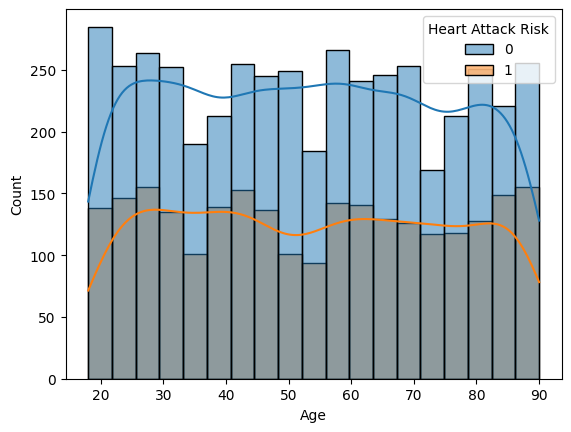

In [10]:
sns.histplot(train,x='Age',hue='Heart Attack Risk',kde=True)

<Axes: xlabel='Age_group', ylabel='Count'>

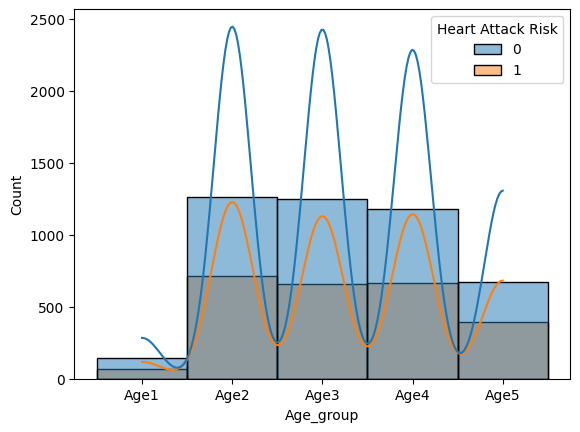

In [7]:
age_split = [0,20,40,60,80,1000]
age_label = ['Age1', 'Age2', 'Age3', 'Age4', 'Age5']
train['Age_group'] = pd.cut(train['Age'], bins=age_split, labels=age_label, right=False, include_lowest=True)
sns.histplot(train,x='Age_group',hue='Heart Attack Risk',kde=True)

<Axes: xlabel='Sex', ylabel='count'>

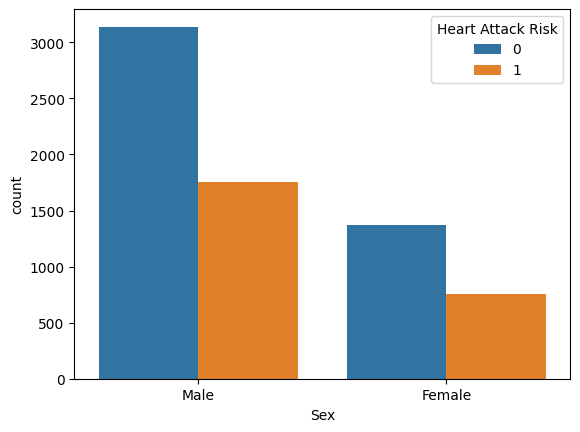

In [8]:
sns.countplot(data=train, x='Sex', hue='Heart Attack Risk')

<Axes: xlabel='Cholesterol', ylabel='Count'>

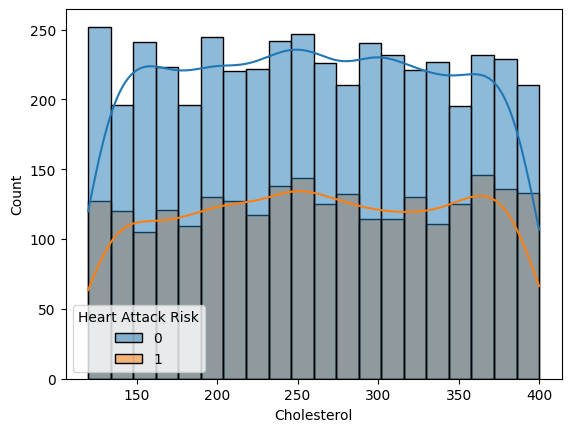

In [9]:
sns.histplot(train,x='Cholesterol',hue='Heart Attack Risk',kde=True)

<Axes: xlabel='Up Blood Pressure', ylabel='Count'>

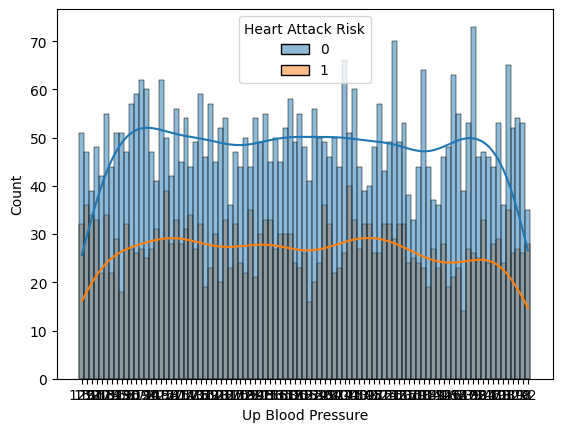

In [10]:
sns.histplot(train,x='Up Blood Pressure',hue='Heart Attack Risk',kde=True)

<Axes: xlabel='Down Blood Pressure', ylabel='Count'>

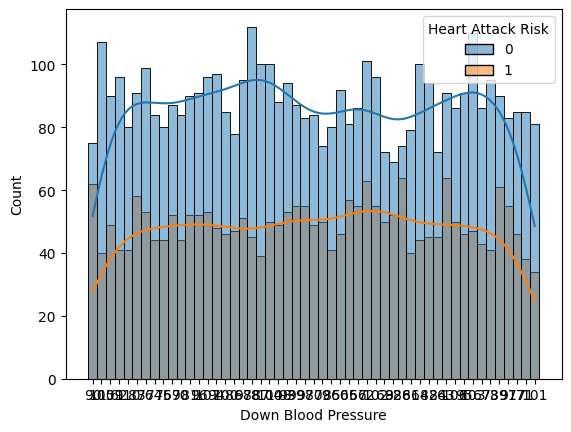

In [11]:
sns.histplot(train,x='Down Blood Pressure',hue='Heart Attack Risk',kde=True)

<Axes: xlabel='Heart Rate', ylabel='Count'>

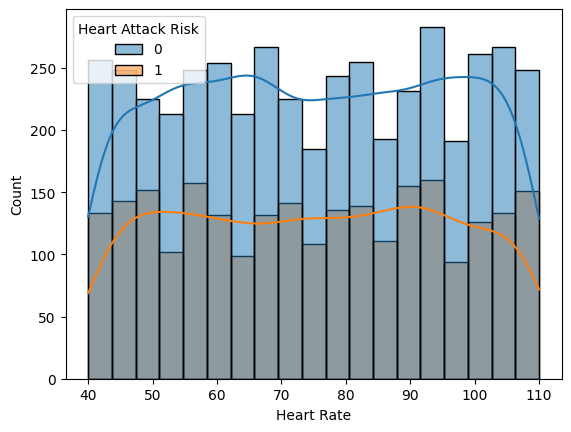

In [12]:
sns.histplot(train,x='Heart Rate',hue='Heart Attack Risk',kde=True)

<Axes: xlabel='Diabetes', ylabel='count'>

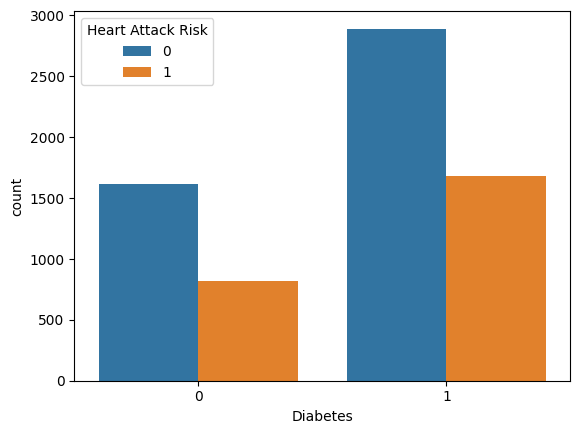

In [13]:
sns.countplot(data=train, x='Diabetes', hue='Heart Attack Risk')

<Axes: xlabel='Smoking', ylabel='count'>

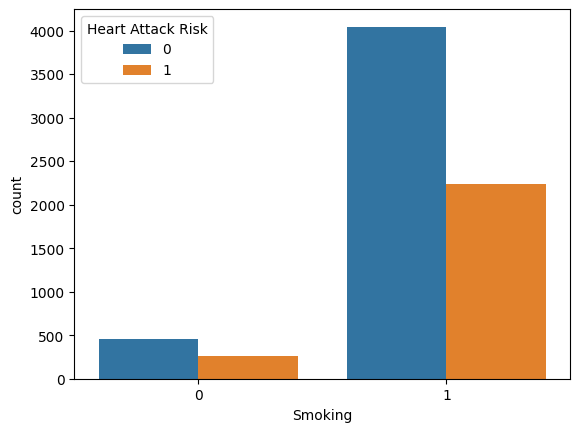

In [14]:
sns.countplot(data=train, x='Smoking', hue='Heart Attack Risk')

<Axes: xlabel='Obesity', ylabel='count'>

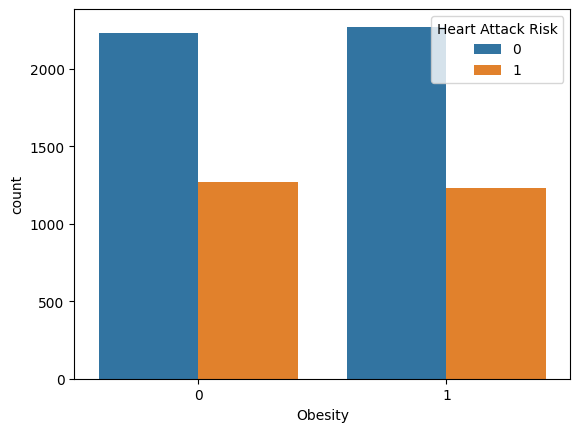

In [15]:
sns.countplot(data=train, x='Obesity', hue='Heart Attack Risk')

<Axes: xlabel='Alcohol Consumption', ylabel='count'>

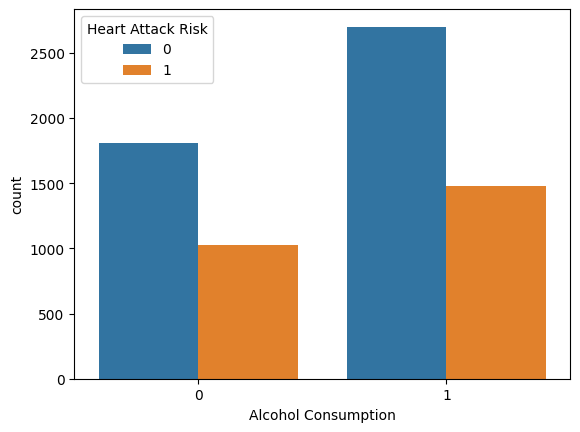

In [16]:
sns.countplot(data=train, x='Alcohol Consumption', hue='Heart Attack Risk')

<Axes: xlabel='Exercise Hours Per Week', ylabel='Count'>

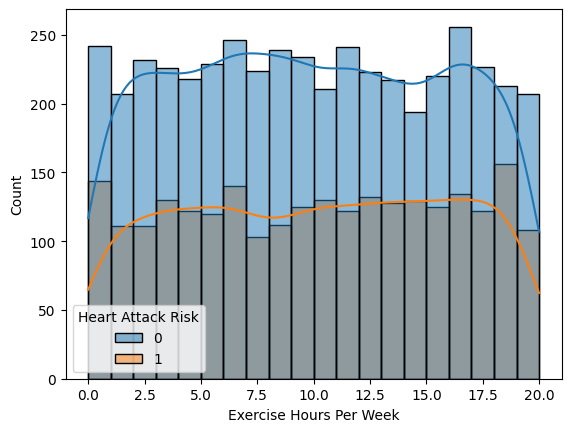

In [17]:
sns.histplot(train,x='Exercise Hours Per Week',hue='Heart Attack Risk',kde=True)

<Axes: xlabel='Diet', ylabel='count'>

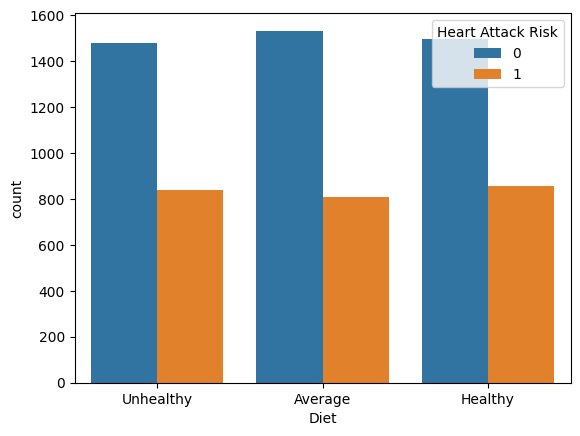

In [18]:
sns.countplot(data=train, x='Diet', hue='Heart Attack Risk')

<Axes: xlabel='Previous Heart Problems', ylabel='count'>

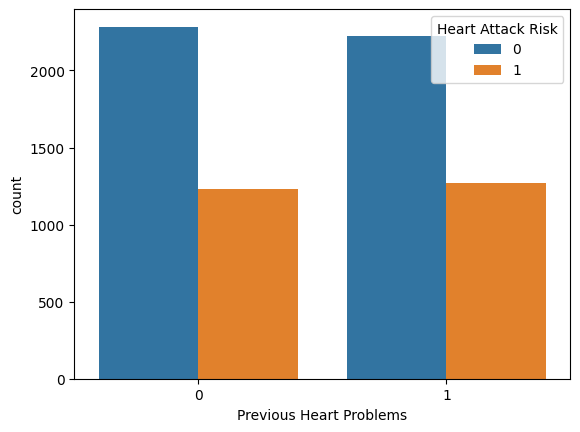

In [19]:
sns.countplot(data=train, x='Previous Heart Problems', hue='Heart Attack Risk')

<Axes: xlabel='Medication Use', ylabel='count'>

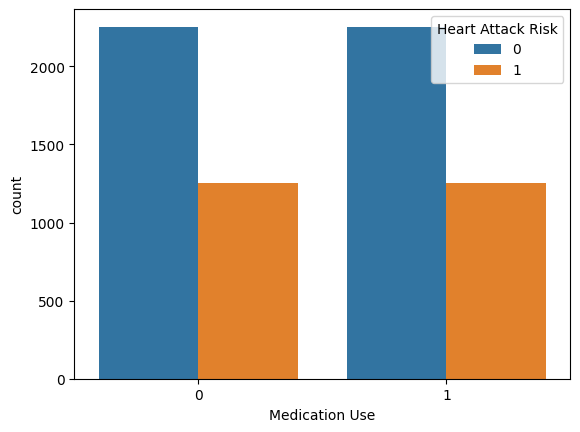

In [20]:
sns.countplot(data=train, x='Medication Use', hue='Heart Attack Risk')

<Axes: xlabel='Stress Level', ylabel='count'>

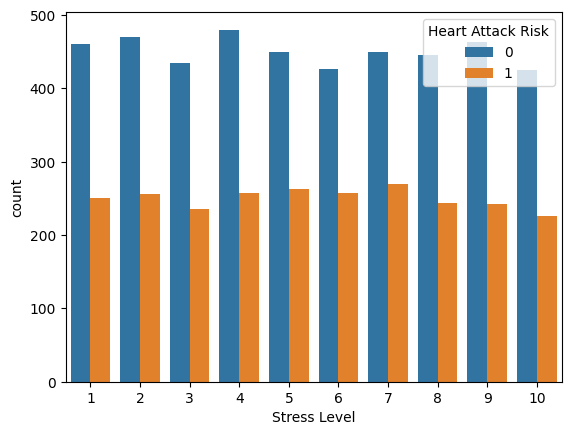

In [21]:
sns.countplot(data=train, x='Stress Level', hue='Heart Attack Risk')

<Axes: xlabel='Sedentary Hours Per Day', ylabel='Count'>

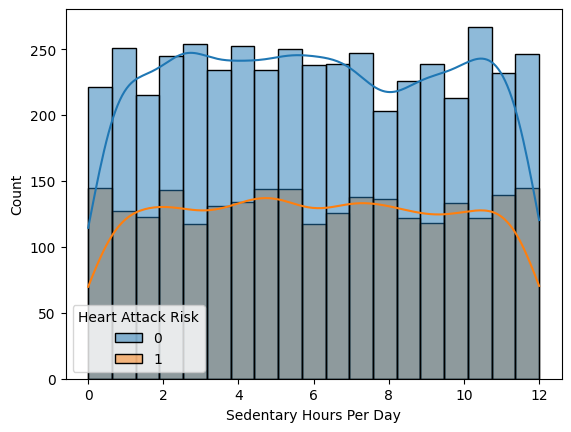

In [22]:
sns.histplot(train,x='Sedentary Hours Per Day',hue='Heart Attack Risk',kde=True)

<Axes: xlabel='Income', ylabel='Count'>

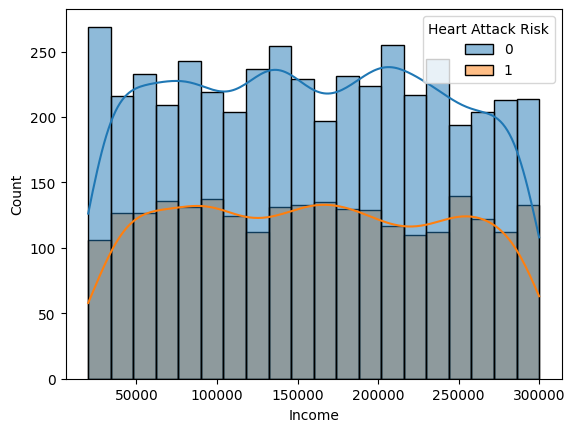

In [23]:
sns.histplot(train,x='Income',hue='Heart Attack Risk',kde=True)

<Axes: xlabel='BMI', ylabel='Count'>

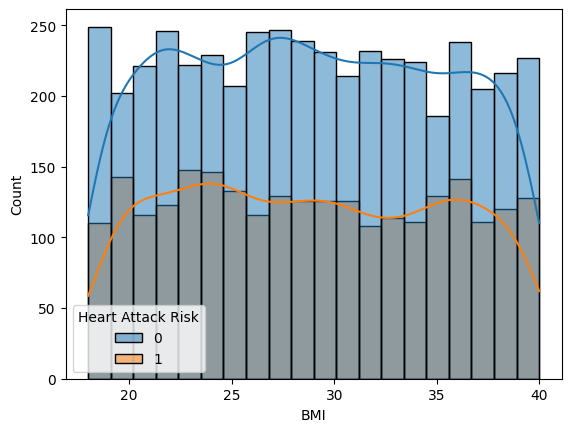

In [24]:
sns.histplot(train,x='BMI',hue='Heart Attack Risk',kde=True)

<Axes: xlabel='Triglycerides', ylabel='Count'>

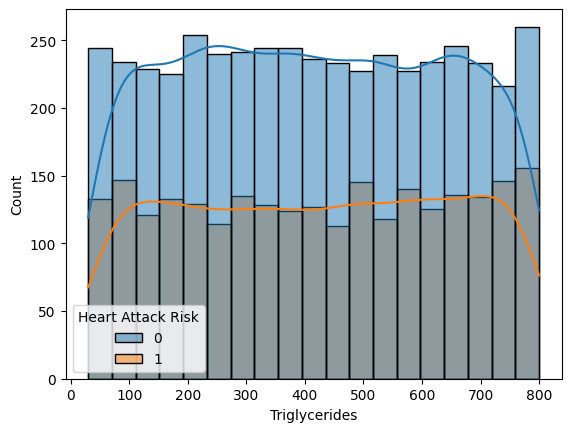

In [25]:
sns.histplot(train,x='Triglycerides',hue='Heart Attack Risk',kde=True)

<Axes: xlabel='Physical Activity Days Per Week', ylabel='Count'>

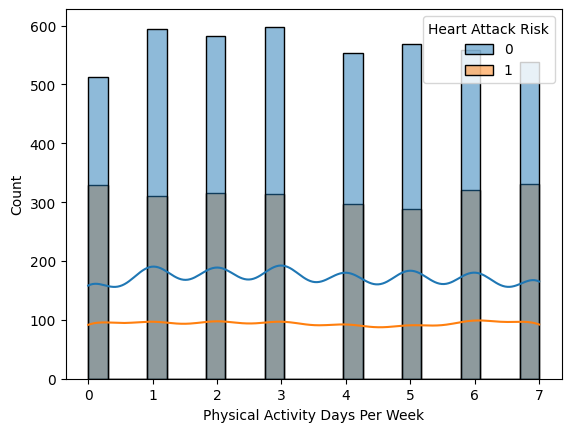

In [26]:
sns.histplot(train,x='Physical Activity Days Per Week',hue='Heart Attack Risk',kde=True)

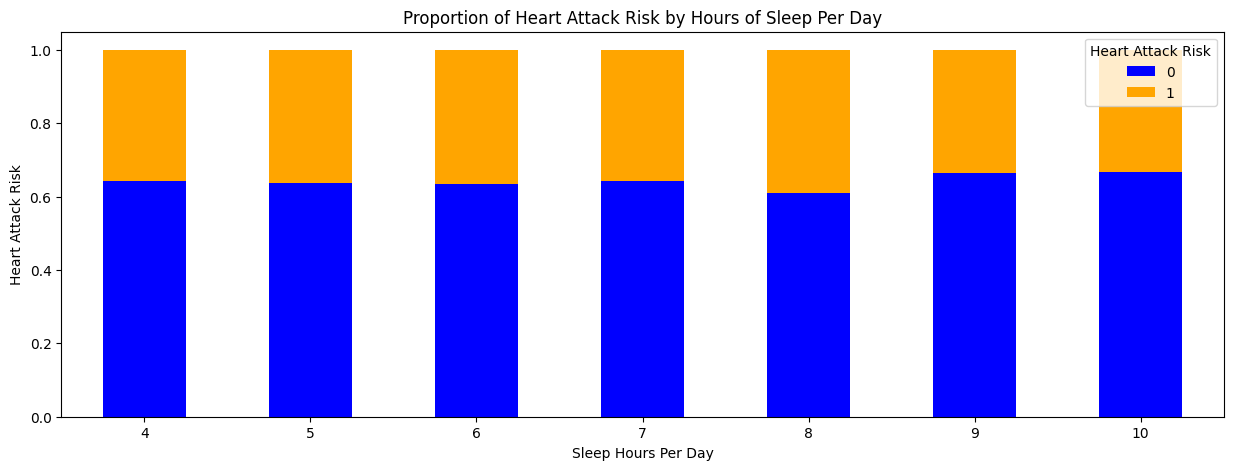

In [3]:
# sns.histplot(train,x='Sleep Hours Per Day',hue='Heart Attack Risk')
grouped_data = train.groupby('Sleep Hours Per Day')['Heart Attack Risk'].value_counts(normalize=True).unstack()

# Plotting the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(15, 5))

# Adding labels and title
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Heart Attack Risk')
plt.title('Proportion of Heart Attack Risk by Hours of Sleep Per Day')
plt.legend(title='Heart Attack Risk')
plt.xticks(rotation=0)  # Rotates the x-axis labels to show them horizontally
plt.show()

<Axes: xlabel='Country', ylabel='Count'>

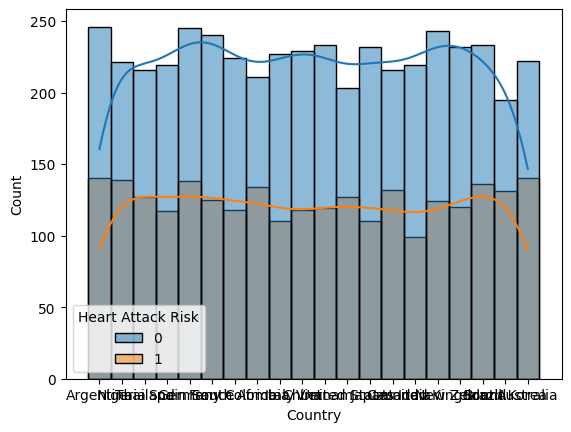

In [28]:
#sns.countplot(data=train, x='Sedentary Hours Per Day', hue='Heart Attack Risk')
sns.histplot(train,x='Country',hue='Heart Attack Risk',kde=True)

<Axes: xlabel='Continent', ylabel='Count'>

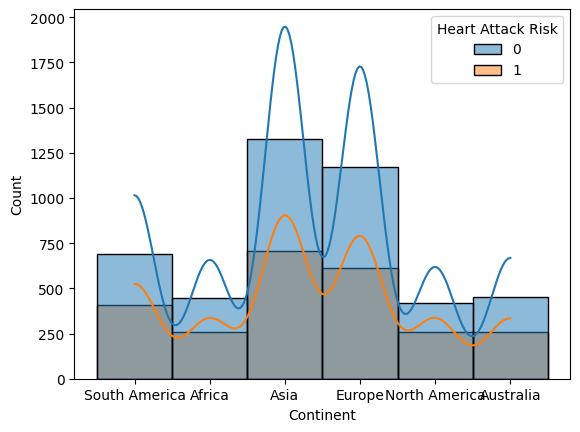

In [29]:
#sns.countplot(data=train, x='Sedentary Hours Per Day', hue='Heart Attack Risk')
sns.histplot(train,x='Continent',hue='Heart Attack Risk',kde=True)

<Axes: xlabel='Hemisphere', ylabel='count'>

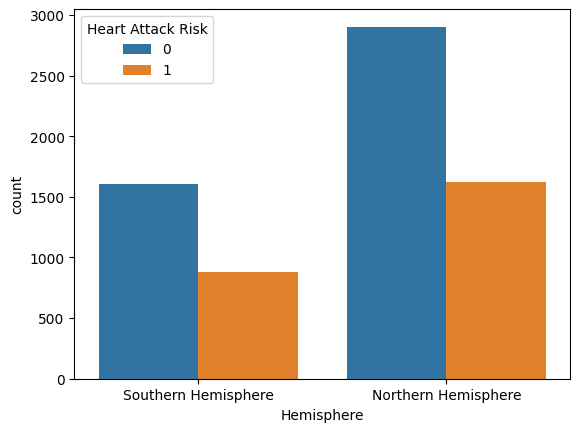

In [30]:
sns.countplot(data=train, x='Hemisphere', hue='Heart Attack Risk')

<a id="4"></a>
# **<center><span style="color:#005dc4;">Preprocessing</span></center>**

In [31]:
train['Diet'] = train['Diet'].replace({'Unhealthy':0,'Average':1,'Healthy':2})
train['Sex'] = train['Sex'].replace({'Male':0,'Female':1})
train['Continent'] = train['Continent'].replace({'South America':0,'Africa':1,'Asia':2,'Europe':3,'North America':4,'Australia':5})
train['Hemisphere'] = train['Hemisphere'].replace({'Southern Hemisphere':0,'Northern Hemisphere':1})
train['Age_group'] = train['Age_group'].replace({'Age1':0,'Age2':1,'Age3':2,'Age4':3,'Age5':4})
train

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Up Blood Pressure,Down Blood Pressure,Age_group
0,RDG0550,33,0,200,129/90,48,0,1,1,1,...,63,6,7,Argentina,0,0,1,129,90,1
1,NMA3851,56,1,262,159/105,46,1,0,1,0,...,333,7,8,Nigeria,1,1,1,159,105,2
2,TUI5807,19,1,140,161/109,54,0,1,0,0,...,537,2,10,Thailand,2,1,0,161,109,0
3,YYT5016,50,1,163,120/62,53,0,1,1,1,...,591,0,9,Spain,3,0,1,120,62,2
4,ZAC5937,89,1,144,153/110,92,1,0,1,0,...,145,2,5,Germany,3,1,1,153,110,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,BCB2291,29,1,267,104/105,87,0,0,0,1,...,598,4,5,France,3,1,0,104,105,1
7006,KIG5207,83,0,296,134/99,77,1,1,1,1,...,465,4,4,United Kingdom,3,1,0,134,99,4
7007,GCY1316,54,0,120,134/84,103,1,1,1,1,...,674,6,9,Colombia,0,1,0,134,84,2
7008,RPK2629,42,1,147,144/76,81,0,0,1,0,...,623,7,10,Spain,3,0,1,144,76,2


In [32]:
train = train.drop(columns=['Patient ID','Blood Pressure','Country','Age'], axis = 1)
train

,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Hemisphere,Heart Attack Risk,Up Blood Pressure,Down Blood Pressure,Age_group
0,0,200,48,0,1,1,1,1,7.807690,0,...,30.449815,63,6,7,0,0,1,129,90,1
1,1,262,46,1,0,1,0,0,17.297628,1,...,34.973685,333,7,8,1,1,1,159,105,2
2,1,140,54,0,1,0,0,1,8.695288,1,...,30.554246,537,2,10,2,1,0,161,109,0
3,1,163,53,0,1,1,1,1,10.161587,2,...,35.390265,591,0,9,3,0,1,120,62,2
4,1,144,92,1,0,1,0,1,16.436787,2,...,39.575483,145,2,5,3,1,1,153,110,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,1,267,87,0,0,0,1,1,15.891827,0,...,27.521246,598,4,5,3,1,0,104,105,1
7006,0,296,77,1,1,1,1,0,5.783338,2,...,21.332449,465,4,4,3,1,0,134,99,4
7007,0,120,103,1,1,1,1,1,7.345259,1,...,37.465577,674,6,9,0,1,0,134,84,2
7008,1,147,81,0,0,1,0,1,10.056501,0,...,28.605789,623,7,10,3,0,1,144,76,2


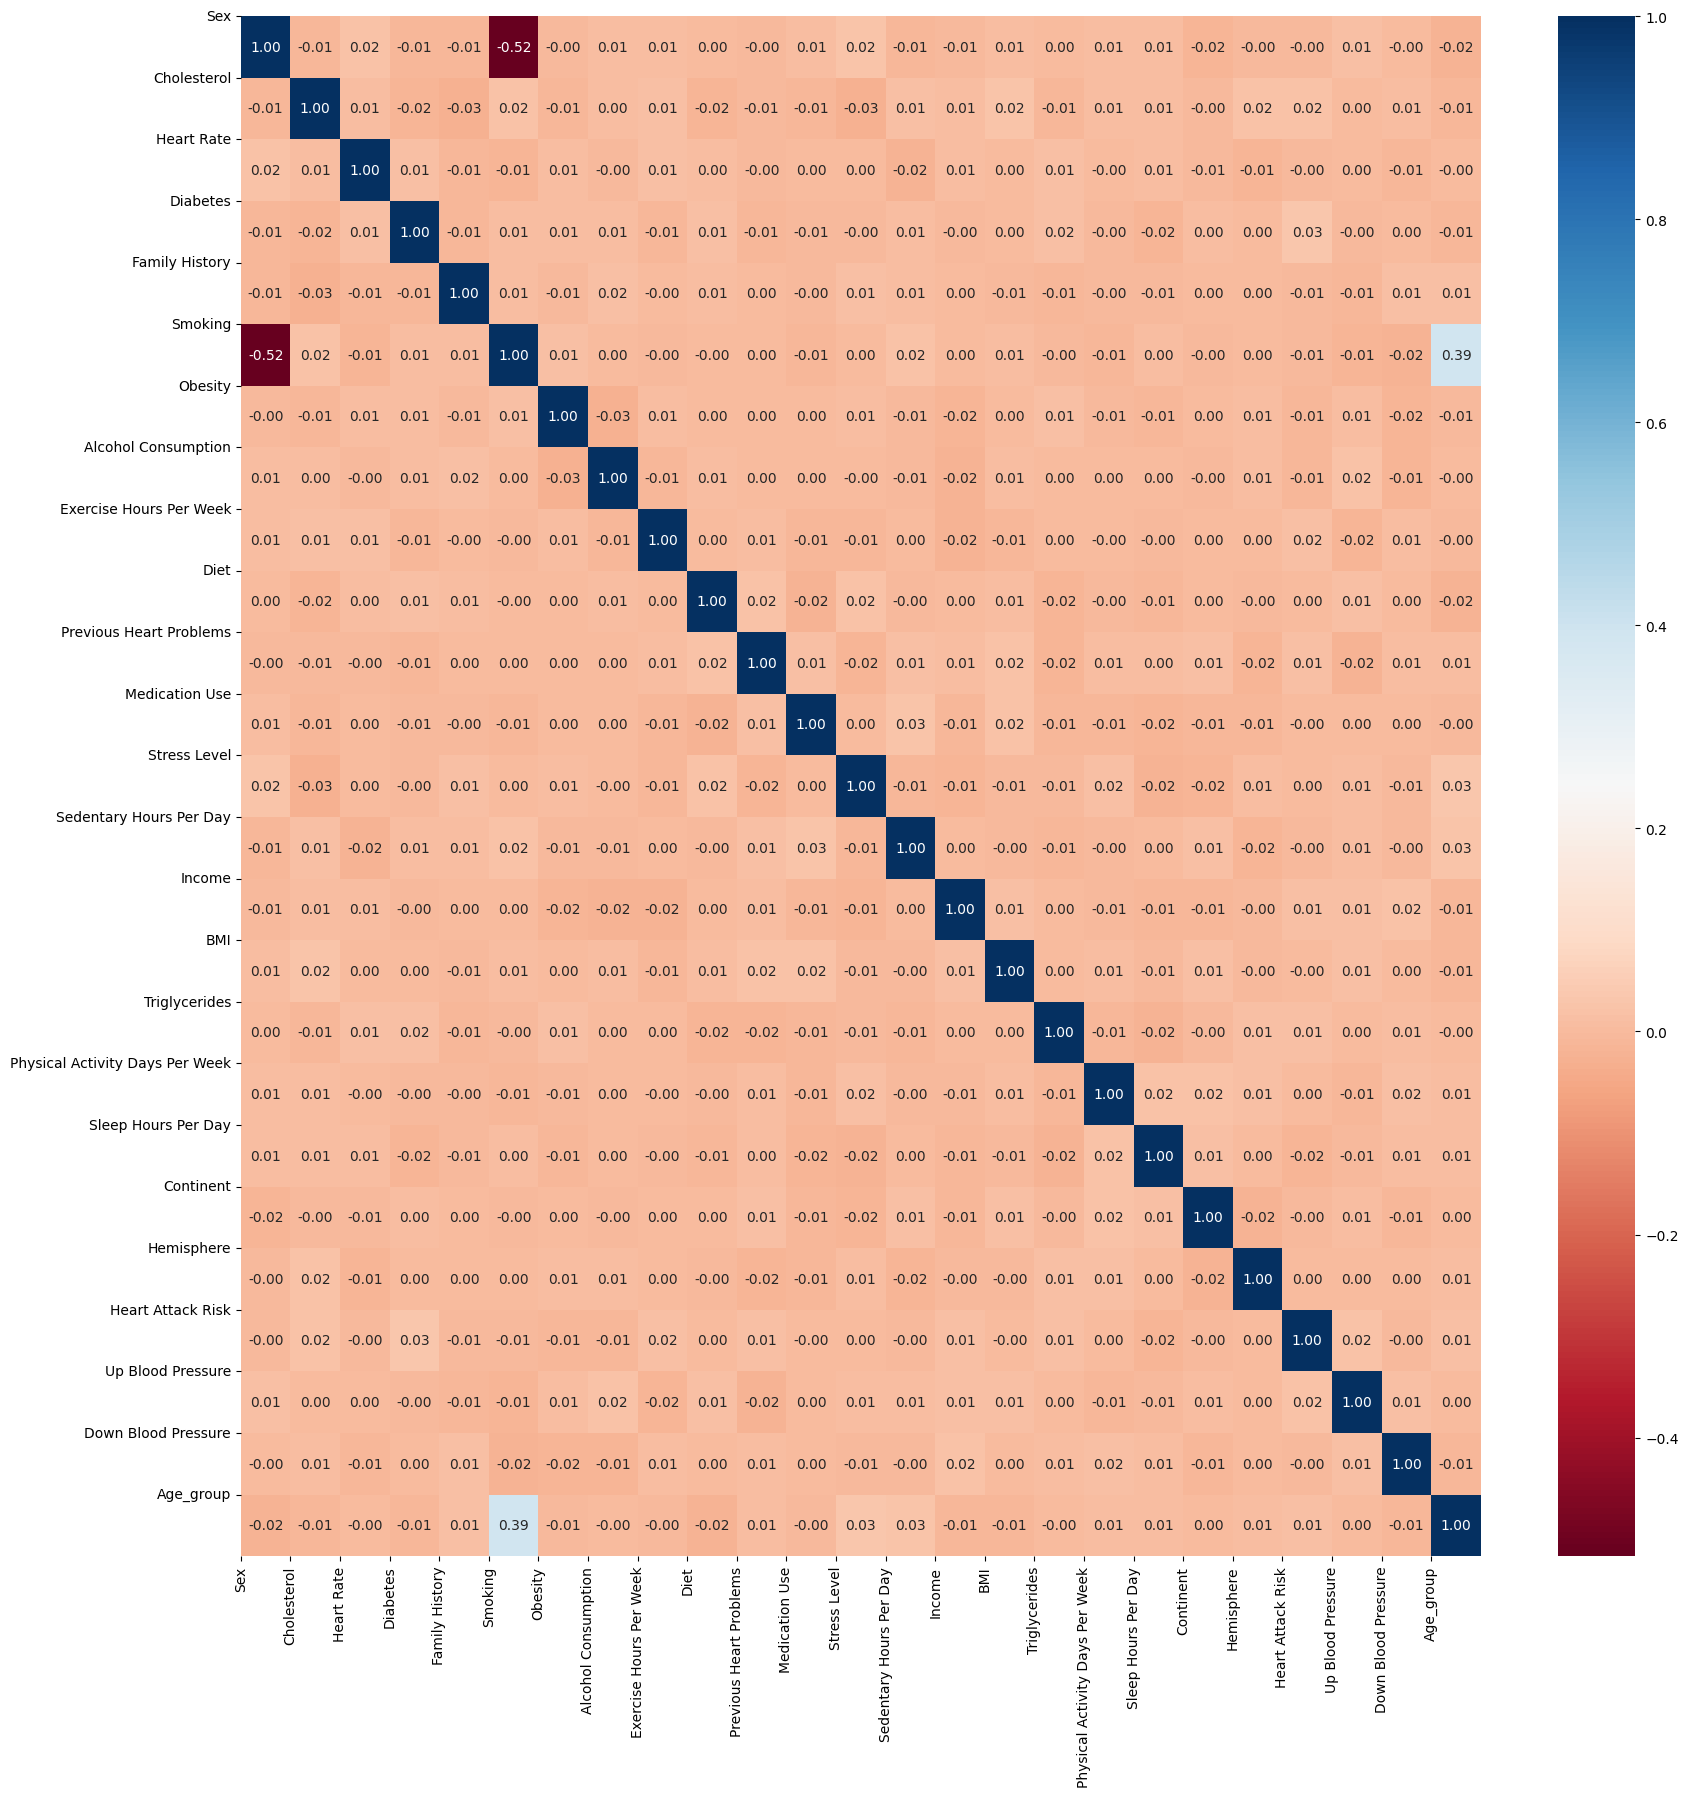

In [33]:
#Correlation Matrix with Heatmap
#method:pearson
corr = train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [34]:
X= train.drop(columns=["Heart Attack Risk"],axis=1)
y= train["Heart Attack Risk"]

<a id="5"></a>
# **<center><span style="color:#005dc4;">Target distribution</span></center>**

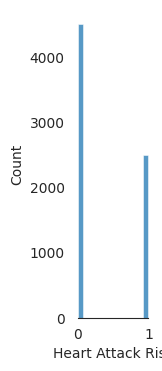

Skewness: 0.596135
Kurtosis: -1.645093


In [35]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(1, 4))
sns.histplot(train['Heart Attack Risk'])
ax.xaxis.grid(False)

sns.despine(trim=True, left=True)
plt.show()

print("Skewness: %f" % train['Heart Attack Risk'].skew())
print("Kurtosis: %f" % train['Heart Attack Risk'].kurt())

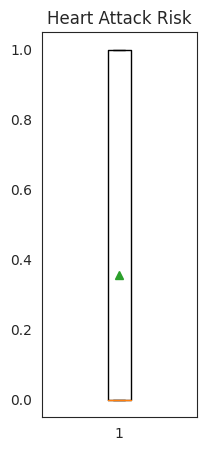

In [36]:
plt.figure(figsize=(2,5))
plt.boxplot(train['Heart Attack Risk'],showmeans=True)
plt.title('Heart Attack Risk')
plt.show()

In [37]:
from collections import Counter
print(Counter(y))
print(X.shape)

Counter({0: 4506, 1: 2504})
(7010, 24)


<a id="6"></a>
# **<center><span style="color:#005dc4;">Feature engineering</span></center>**

In [38]:
X_train=X
y_train=y

from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
X_train = StandardScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.658213,-0.741985,-1.321876,-1.371143,1.016397,0.34016,1.000285,0.823552,-0.376374,-1.231102,...,0.320437,0.248519,-1.578122,1.099742,-0.012468,-1.588265,-1.349837,-0.229353,0.329059,-1.106467
1,1.519264,0.026260,-1.419410,0.729319,-0.983868,0.34016,-0.999715,-1.214252,1.268526,-0.005768,...,0.664060,0.964100,-0.373728,1.538163,0.489851,-0.909544,0.740830,0.914449,1.346813,-0.203518
2,1.519264,-1.485447,-1.029274,-1.371143,1.016397,-2.93979,-0.999715,0.823552,-0.222526,-0.005768,...,1.166023,0.265038,0.536259,-0.653941,1.494489,-0.230823,0.740830,0.990702,1.618214,-2.009416
3,1.519264,-1.200453,-1.078041,-1.371143,1.016397,0.34016,1.000285,0.823552,0.031629,1.219565,...,-0.450379,1.029995,0.777137,-1.530783,0.992170,0.447898,-1.349837,-0.572494,-1.570748,-0.203518
4,1.519264,-1.435883,0.823869,0.729319,-0.983868,0.34016,-0.999715,0.823552,1.119315,1.219565,...,0.271479,1.692008,-1.212343,-0.653941,-1.017107,0.447898,0.740830,0.685688,1.686064,1.602381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,1.519264,0.088215,0.580034,-1.371143,-0.983868,-2.93979,1.000285,0.823552,1.024857,-1.231102,...,0.967226,-0.214720,0.808362,0.222900,-1.017107,0.447898,0.740830,-1.182522,1.346813,-1.106467
7006,-0.658213,0.447555,0.092365,0.729319,1.016397,0.34016,1.000285,-1.214252,-0.727257,1.219565,...,1.317265,-1.193658,0.215087,0.222900,-1.519426,0.447898,0.740830,-0.038720,0.939711,1.602381
7007,-0.658213,-1.733268,1.360305,0.729319,1.016397,0.34016,1.000285,0.823552,-0.456528,-0.005768,...,0.497802,1.358265,1.147377,1.099742,0.992170,-1.588265,0.740830,-0.038720,-0.078042,-0.203518
7008,1.519264,-1.398710,0.287433,-1.371143,-0.983868,0.34016,-0.999715,0.823552,0.013414,-1.231102,...,0.553275,-0.043168,0.919880,1.538163,1.494489,0.447898,-1.349837,0.342548,-0.620844,-0.203518


<a id="7"></a>
# **<center><span style="color:#005dc4;">Split Dataset</span></center>**

In [39]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (5608, 24)
Shape of X_eval:  (1402, 24)
Shape of y_train:  (5608,)
Shape of y_eval (1402,)


<a id="8"></a>
# **<center><span style="color:#005dc4;">Modeling</span></center>**

svm accuracy is: 66.405%


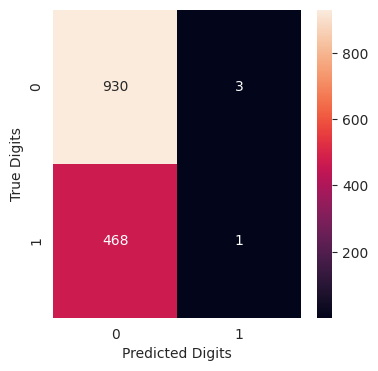

Dummy accuracy is: 66.548%


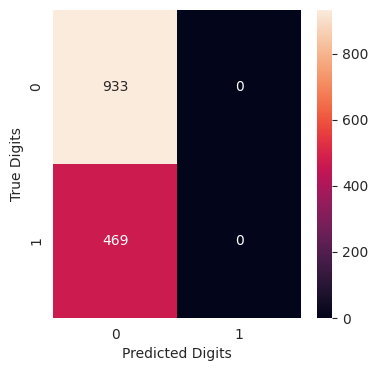

LGBM accuracy is: 62.625%


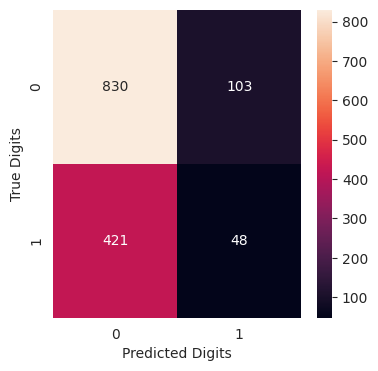

Log accuracy is: 66.548%


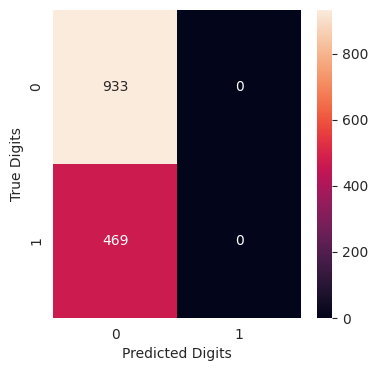

SGD accuracy is: 62.553%


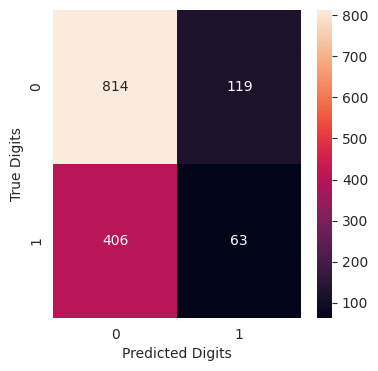

GNB accuracy is: 66.548%


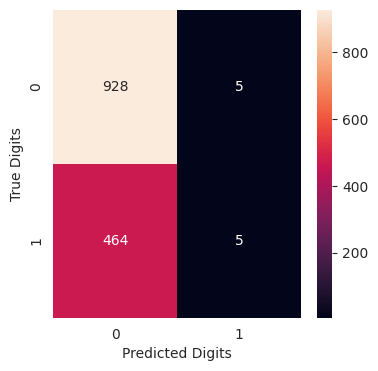

KNN accuracy is: 62.767%


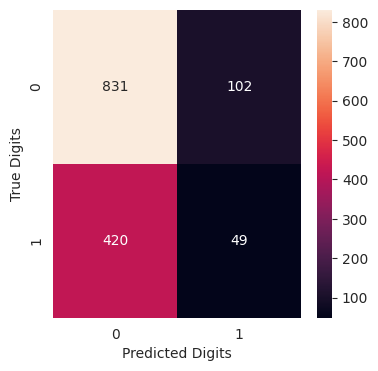

RF accuracy is: 62.054%


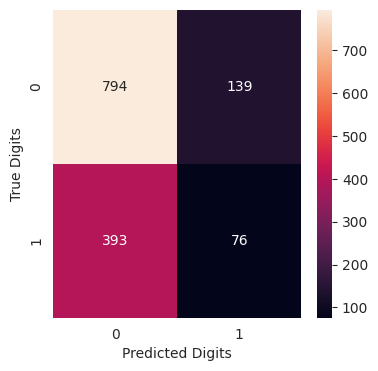

Ext accuracy is: 61.698%


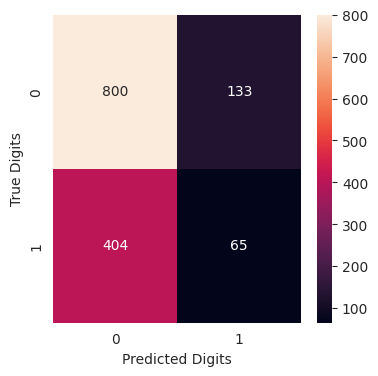

HGB accuracy is: 61.912%


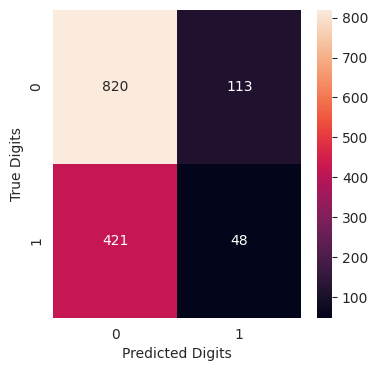

XGB accuracy is: 63.695%


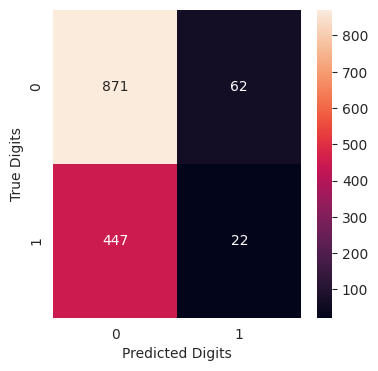

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC


svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_eval) # predict our file test data
svm_acc = accuracy_score(y_eval, y_pred_svm)
print("svm accuracy is: {0:.3f}%".format(svm_acc * 100))
cm = confusion_matrix(y_eval, y_pred_svm)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

Dummy = DummyClassifier()
Dummy.fit(X_train, y_train)
y_pred_Dummy = Dummy.predict(X_eval) # predict our file test data
Dummy_acc = accuracy_score(y_eval, y_pred_Dummy)
print("Dummy accuracy is: {0:.3f}%".format(Dummy_acc * 100))
cm = confusion_matrix(y_eval, y_pred_Dummy)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()


LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)
y_pred_LGBM = LGBM.predict(X_eval) # predict our file test data
LGBM_acc = accuracy_score(y_eval, y_pred_LGBM)
print("LGBM accuracy is: {0:.3f}%".format(LGBM_acc * 100))
cm = confusion_matrix(y_eval, y_pred_LGBM)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()



Log = LogisticRegression()
Log.fit(X_train, y_train)
y_pred_Log = Log.predict(X_eval) # predict our file test data
Log_acc = accuracy_score(y_eval, y_pred_Log)
print("Log accuracy is: {0:.3f}%".format(Log_acc * 100))
cm = confusion_matrix(y_eval, y_pred_Log)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

SGD = SGDClassifier()
SGD.fit(X_train, y_train)
y_pred_SGD = SGD.predict(X_eval) # predict our file test data
SGD_acc = accuracy_score(y_eval, y_pred_SGD)
print("SGD accuracy is: {0:.3f}%".format(SGD_acc * 100))
cm = confusion_matrix(y_eval, y_pred_SGD)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred_GNB = GNB.predict(X_eval) # predict our file test data
GNB_acc = accuracy_score(y_eval, y_pred_GNB)
print("GNB accuracy is: {0:.3f}%".format(GNB_acc * 100))
cm = confusion_matrix(y_eval, y_pred_GNB)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()


knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_eval) # predict our file test data
knn_acc = accuracy_score(y_eval, y_pred_knn)
print("KNN accuracy is: {0:.3f}%".format(knn_acc * 100))
cm = confusion_matrix(y_eval, y_pred_knn)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()


RF = RandomForestClassifier(n_estimators=10)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_eval) # predict our file test data
RF_acc = accuracy_score(y_eval, y_pred_RF)
print("RF accuracy is: {0:.3f}%".format(RF_acc * 100))
cm = confusion_matrix(y_eval, y_pred_RF)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()


Ext = ExtraTreesClassifier(n_estimators=10)
Ext.fit(X_train, y_train)
y_pred_Ext = Ext.predict(X_eval) # predict our file test data
Ext_acc = accuracy_score(y_eval, y_pred_Ext)
print("Ext accuracy is: {0:.3f}%".format(Ext_acc * 100))
cm = confusion_matrix(y_eval, y_pred_Ext)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()



HGB = HistGradientBoostingClassifier()
HGB.fit(X_train, y_train)
y_pred_HGB = HGB.predict(X_eval) # predict our file test data
HGB_acc = accuracy_score(y_eval, y_pred_HGB)
print("HGB accuracy is: {0:.3f}%".format(HGB_acc * 100))
cm = confusion_matrix(y_eval, y_pred_HGB)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()



XGB = XGBClassifier(n_estimators=10)
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_eval) # predict our file test data
XGB_acc = accuracy_score(y_eval, y_pred_XGB)
print("XGB accuracy is: {0:.3f}%".format(XGB_acc * 100))
cm = confusion_matrix(y_eval, y_pred_XGB)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

<a id="9"></a>
# **<center><span style="color:#005dc4;">StackingClassifier</span></center>**

In [41]:
class StackingAveragedModels(BaseEstimator, ClassifierMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)



In [42]:
stacked_averaged_models = StackingAveragedModels(base_models = (Log,GNB,svm,Dummy),meta_model = SGD) 
# remove knn,HGB,XGB,Ext,RF,LGBM

In [43]:
stacking_model=stacked_averaged_models.fit(X_train.values, y_train.values)

stacking accuracy is: 66.548%


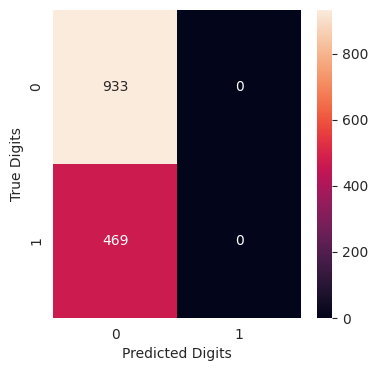

In [44]:
stacking_model.fit(X_train.values , y_train.values)
y_pred_stacking = stacking_model.predict(X_eval.values) # predict our file test data
stacking_acc = accuracy_score(y_eval.values, y_pred_stacking)
print("stacking accuracy is: {0:.3f}%".format(stacking_acc * 100))
cm = confusion_matrix(y_eval, y_pred_stacking)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

<a id="10"></a>
# **<center><span style="color:#005dc4;">VotingClassifier</span></center>**

In [45]:
from sklearn.ensemble import VotingClassifier
clf1 = SVC()
clf2 = DummyClassifier()
clf3 = LogisticRegression()
clf4 = SGDClassifier()
clf5 = GaussianNB()

eclf = VotingClassifier(estimators=[('svm', clf1), ('Dummy', clf2), ('Log', clf3), ('SGD', clf4), ('GNB', clf5)],voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['SVC', 'Dummy', 'Log','SGD','GNB', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.64 (+/- 0.00) [SVC]
Accuracy: 0.64 (+/- 0.00) [Dummy]
Accuracy: 0.64 (+/- 0.00) [Log]
Accuracy: 0.60 (+/- 0.02) [SGD]
Accuracy: 0.63 (+/- 0.01) [GNB]
Accuracy: 0.64 (+/- 0.00) [Ensemble]


In [46]:
Voting_model = VotingClassifier(estimators=[('svm', clf1), ('Dummy', clf2), ('Log', clf3), ('SGD', clf4), ('GNB', clf5)],
                         voting='hard')  #voting='soft', weights=[1, 1, 2]
clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
clf4 = clf4.fit(X_train, y_train)
clf5 = clf5.fit(X_train, y_train)
Voting_model = eclf.fit(X_train, y_train)

Voting accuracy is: 66.548%


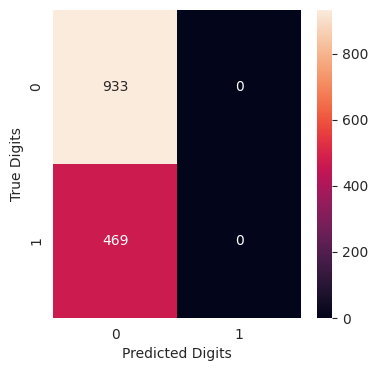

In [47]:
y_pred_Voting = Voting_model.predict(X_eval) # predict our file test data
Voting_acc = accuracy_score(y_eval, y_pred_Voting)
print("Voting accuracy is: {0:.3f}%".format(Voting_acc * 100))
cm = confusion_matrix(y_eval, y_pred_Voting)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

<a id="11"></a>
# **<center><span style="color:#005dc4;">Accuracy</span></center>**

In [48]:
models = [('Svm', svm_acc),
          ('Dummy', Dummy_acc),
          ('Logistic', Log_acc),
          ('SGD', SGD_acc),
          ('GNB', GNB_acc),
          ('KNeighbors', knn_acc),
          ('RandomForest', RF_acc),
          ('LGBM', LGBM_acc),
          ('XGBoost', XGB_acc),
          ('KNeighbors', knn_acc),
          ('HistGradientBoosting', HGB_acc),
          ('ExtraTrees',Ext_acc ),
          ('Voting', Voting_acc),
          ('Stacking', stacking_acc)
         ]                                           

predict = pd.DataFrame(data = models, columns=['Model', 'Accuracy'])
predict

,Model,Accuracy
0,Svm,0.664051
1,Dummy,0.665478
2,Logistic,0.665478
3,SGD,0.625535
4,GNB,0.665478
5,KNeighbors,0.627675
6,RandomForest,0.620542
7,LGBM,0.626248
8,XGBoost,0.636947
9,KNeighbors,0.627675


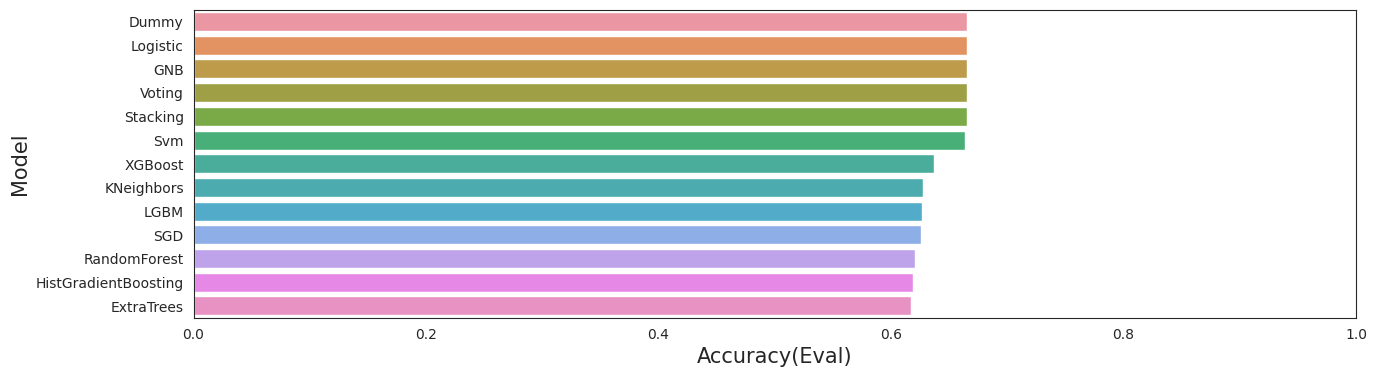

In [49]:
#Visualizing Model Performance
f, axe = plt.subplots(1,1, figsize=(15,4))

predict.sort_values(by=['Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Accuracy', y='Model',  data = predict, ax = axe)
axe.set_xlabel('Accuracy(Eval)', size=15)
axe.set_ylabel('Model', size=15)
axe.set_xlim(0,1.0)
plt.show()

<a id="12"></a>
# **<center><span style="color:#005dc4;">Predict test data</span></center>**

In [50]:
import_test0 = test.reset_index(drop=True)
import_test0[['Up Blood Pressure','Down Blood Pressure']] = import_test0['Blood Pressure'].str.split('/',expand=True)
import_test = import_test0.drop(columns=['Patient ID','Blood Pressure','Country'],axis=1)
import_test

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Hemisphere,Up Blood Pressure,Down Blood Pressure
0,67,Male,208,72,0,0,1,0,0,4.168189,...,6.615001,261404,31.251233,286,0,6,South America,Southern Hemisphere,158,88
1,84,Male,220,107,0,0,1,1,1,3.427929,...,10.543780,122093,22.221862,370,6,7,Asia,Northern Hemisphere,131,68
2,60,Male,145,71,1,0,1,0,1,1.892559,...,5.994228,234966,29.162319,247,7,7,North America,Northern Hemisphere,160,98
3,45,Male,294,66,0,0,1,1,1,13.693785,...,7.007392,216565,25.120605,360,4,6,Europe,Northern Hemisphere,130,84
4,36,Male,133,97,1,0,1,1,1,3.618009,...,10.963544,223132,22.386804,605,5,10,North America,Northern Hemisphere,161,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,81,Male,137,61,1,0,1,1,0,8.066467,...,6.766948,50533,35.074391,191,3,10,Europe,Southern Hemisphere,143,64
1749,34,Female,304,93,0,1,0,1,1,6.658321,...,6.900037,223874,22.418494,791,4,5,Asia,Northern Hemisphere,102,92
1750,75,Male,176,78,0,0,1,1,1,18.382487,...,6.634988,228009,23.793280,748,5,8,Europe,Southern Hemisphere,102,89
1751,25,Male,307,78,0,1,1,0,1,3.272202,...,10.516775,79211,33.469360,296,7,5,Europe,Southern Hemisphere,137,94


In [51]:
age_split = [0,20,40,60,80,1000]
age_label = ['Age1', 'Age2', 'Age3', 'Age4', 'Age5']
import_test['Age_group'] = pd.cut(import_test['Age'], bins=age_split, labels=age_label, right=False, include_lowest=True)

import_test = import_test.drop(columns=['Age'],axis=1)#drop
import_test

,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Hemisphere,Up Blood Pressure,Down Blood Pressure,Age_group
0,Male,208,72,0,0,1,0,0,4.168189,Average,...,261404,31.251233,286,0,6,South America,Southern Hemisphere,158,88,Age4
1,Male,220,107,0,0,1,1,1,3.427929,Average,...,122093,22.221862,370,6,7,Asia,Northern Hemisphere,131,68,Age5
2,Male,145,71,1,0,1,0,1,1.892559,Healthy,...,234966,29.162319,247,7,7,North America,Northern Hemisphere,160,98,Age4
3,Male,294,66,0,0,1,1,1,13.693785,Healthy,...,216565,25.120605,360,4,6,Europe,Northern Hemisphere,130,84,Age3
4,Male,133,97,1,0,1,1,1,3.618009,Healthy,...,223132,22.386804,605,5,10,North America,Northern Hemisphere,161,90,Age2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,Male,137,61,1,0,1,1,0,8.066467,Unhealthy,...,50533,35.074391,191,3,10,Europe,Southern Hemisphere,143,64,Age5
1749,Female,304,93,0,1,0,1,1,6.658321,Average,...,223874,22.418494,791,4,5,Asia,Northern Hemisphere,102,92,Age2
1750,Male,176,78,0,0,1,1,1,18.382487,Healthy,...,228009,23.793280,748,5,8,Europe,Southern Hemisphere,102,89,Age4
1751,Male,307,78,0,1,1,0,1,3.272202,Average,...,79211,33.469360,296,7,5,Europe,Southern Hemisphere,137,94,Age2


In [52]:
import_test['Diet'] = import_test['Diet'].replace({'Unhealthy':0,'Average':1,'Healthy':2})
import_test['Sex'] = import_test['Sex'].replace({'Male':0,'Female':1})
import_test['Continent'] = import_test['Continent'].replace({'South America':0,'Africa':1,'Asia':2,'Europe':3,'North America':4,'Australia':5})
import_test['Hemisphere'] = import_test['Hemisphere'].replace({'Southern Hemisphere':0,'Northern Hemisphere':1})
import_test['Age_group'] = import_test['Age_group'].replace({'Age1':0,'Age2':1,'Age3':2,'Age4':3,'Age5':4})
import_test

,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Hemisphere,Up Blood Pressure,Down Blood Pressure,Age_group
0,0,208,72,0,0,1,0,0,4.168189,1,...,261404,31.251233,286,0,6,0,0,158,88,3
1,0,220,107,0,0,1,1,1,3.427929,1,...,122093,22.221862,370,6,7,2,1,131,68,4
2,0,145,71,1,0,1,0,1,1.892559,2,...,234966,29.162319,247,7,7,4,1,160,98,3
3,0,294,66,0,0,1,1,1,13.693785,2,...,216565,25.120605,360,4,6,3,1,130,84,2
4,0,133,97,1,0,1,1,1,3.618009,2,...,223132,22.386804,605,5,10,4,1,161,90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,0,137,61,1,0,1,1,0,8.066467,0,...,50533,35.074391,191,3,10,3,0,143,64,4
1749,1,304,93,0,1,0,1,1,6.658321,1,...,223874,22.418494,791,4,5,2,1,102,92,1
1750,0,176,78,0,0,1,1,1,18.382487,2,...,228009,23.793280,748,5,8,3,0,102,89,3
1751,0,307,78,0,1,1,0,1,3.272202,1,...,79211,33.469360,296,7,5,3,0,137,94,1


In [53]:
test_row = import_test.shape[0]
test_row 

1753

In [54]:
import_train = X.reset_index(drop=True)
import_train

,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Hemisphere,Up Blood Pressure,Down Blood Pressure,Age_group
0,0,200,48,0,1,1,1,1,7.807690,0,...,184066,30.449815,63,6,7,0,0,129,90,1
1,1,262,46,1,0,1,0,0,17.297628,1,...,211755,34.973685,333,7,8,1,1,159,105,2
2,1,140,54,0,1,0,0,1,8.695288,1,...,252203,30.554246,537,2,10,2,1,161,109,0
3,1,163,53,0,1,1,1,1,10.161587,2,...,121954,35.390265,591,0,9,3,0,120,62,2
4,1,144,92,1,0,1,0,1,16.436787,2,...,180121,39.575483,145,2,5,3,1,153,110,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,1,267,87,0,0,0,1,1,15.891827,0,...,236184,27.521246,598,4,5,3,1,104,105,1
7006,0,296,77,1,1,1,1,0,5.783338,2,...,264390,21.332449,465,4,4,3,1,134,99,4
7007,0,120,103,1,1,1,1,1,7.345259,1,...,198358,37.465577,674,6,9,0,1,134,84,2
7008,1,147,81,0,0,1,0,1,10.056501,0,...,202828,28.605789,623,7,10,3,0,144,76,2


In [55]:
Row_Number=test_row 
X_test_target1_df=import_train._append(import_test,ignore_index=True)

from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
X_test_target1_df = StandardScaler.fit_transform(X_test_target1_df)
test_pred_target0= pd.DataFrame(X_test_target1_df)
test_pred_target0 = pd.DataFrame(test_pred_target0).tail(Row_Number)#tail:抓取後面資料
test_pred_target0

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
7010,-0.658765,-0.641579,-0.147042,-1.369651,-0.986061,0.339157,-1.002857,-1.219867,-1.010838,-0.009637,...,1.280130,0.373454,-0.588539,-1.528843,-0.514750,-1.595350,-1.350571,0.870044,0.193782,0.693705
7011,-0.658765,-0.493172,1.556140,-1.369651,-0.986061,0.339157,0.997151,0.819762,-1.138835,-0.009637,...,-0.448925,-1.055511,-0.213096,1.099787,-0.011823,-0.234231,0.740428,-0.154683,-1.169013,1.598308
7012,-0.658765,-1.420716,-0.195704,0.730113,-0.986061,0.339157,-1.002857,0.819762,-1.404313,1.214223,...,0.951995,0.042868,-0.762852,1.537893,-0.011823,1.126888,0.740428,0.945950,0.875179,0.693705
7013,-0.658765,0.422005,-0.439016,-1.369651,-0.986061,0.339157,0.997151,0.819762,0.636216,1.214223,...,0.723612,-0.596763,-0.257791,0.223577,-0.514750,0.446328,0.740428,-0.192636,-0.078777,-0.210899
7014,-0.658765,-1.569123,1.069516,0.730113,-0.986061,0.339157,0.997151,0.819762,-1.105968,1.214223,...,0.805118,-1.029408,0.837252,0.661682,1.496959,1.126888,0.740428,0.983903,0.330061,-1.115502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,-0.658765,-1.519654,-0.682328,0.730113,-0.986061,0.339157,0.997151,-1.219867,-0.336794,-1.233496,...,-1.337091,0.978497,-1.013148,-0.214528,1.496959,0.446328,-1.350571,0.300751,-1.441572,1.598308
8759,1.517992,0.545678,0.874867,-1.369651,1.014136,-2.948488,0.997151,0.819762,-0.580273,-0.009637,...,0.814327,-1.024392,1.668592,0.223577,-1.017677,-0.234231,0.740428,-1.255316,0.466341,-1.115502
8760,-0.658765,-1.037331,0.144932,-1.369651,-0.986061,0.339157,0.997151,0.819762,1.446931,1.214223,...,0.865649,-0.806822,1.476400,0.661682,0.491104,0.446328,-1.350571,-1.255316,0.261922,0.693705
8761,-0.658765,0.582780,0.144932,-1.369651,1.014136,0.339157,-1.002857,0.819762,-1.165761,-0.009637,...,-0.981154,0.724489,-0.543844,1.537893,-1.017677,0.446328,-1.350571,0.073034,0.602620,-1.115502


In [56]:
#predict test
RandomForest_predict =RF.predict(test_pred_target0)
LGBM_predict =LGBM.predict(test_pred_target0)
ExtraTrees_predict =Ext.predict(test_pred_target0)
XGBoost_predict =XGB.predict(test_pred_target0)
HGB_predict =HGB.predict(test_pred_target0)
KNeighbors_predict =knn.predict(test_pred_target0)
SGD_predict =SGD.predict(test_pred_target0)
svm_predict=svm.predict(test_pred_target0)
Log_predict=Log.predict(test_pred_target0)
GNB_predict=GNB.predict(test_pred_target0)
Dummy_predict=Dummy.predict(test_pred_target0)

Stacking_predict=stacking_model.predict(test_pred_target0.values)
Voting_predict=Voting_model.predict(test_pred_target0)

In [57]:
#DataFrame
RandomForest_predict_df = pd.DataFrame(RandomForest_predict)
LGBM_predict_df = pd.DataFrame(LGBM_predict)
ExtraTrees_predict_df=pd.DataFrame(ExtraTrees_predict)
XGBoost_predict_df=pd.DataFrame(XGBoost_predict)
HGB_predict_df=pd.DataFrame(HGB_predict)
KNeighbors_predict_df=pd.DataFrame(KNeighbors_predict)
SGD_predict_df =pd.DataFrame(SGD_predict)
svm_predict_df =pd.DataFrame(svm_predict)
Log_predict_df =pd.DataFrame(Log_predict)
GNB_predict_df =pd.DataFrame(GNB_predict)
Dummy_predict_df =pd.DataFrame(Dummy_predict)
Stacking_predict_df=pd.DataFrame(Stacking_predict)
Voting_predict_df=pd.DataFrame(Voting_predict)

#rename lable
RandomForest_predict_df=RandomForest_predict_df.set_axis(axis=1,labels=['RT_pred'])
LGBM_predict_df=LGBM_predict_df.set_axis(axis=1,labels=['LGBM_pred'])
ExtraTrees_predict_df=ExtraTrees_predict_df.set_axis(axis=1,labels=['EXT_pred'])
XGBoost_predict_df=XGBoost_predict_df.set_axis(axis=1,labels=['XGB_pred'])
HGB_predict_df=HGB_predict_df.set_axis(axis=1,labels=['HGB_pred'])
KNeighbors_predict_df=KNeighbors_predict_df.set_axis(axis=1,labels=['KN_pred'])
SGD_predict_df=SGD_predict_df.set_axis(axis=1,labels=['SGD_pred'])
svm_predict_df=svm_predict_df.set_axis(axis=1,labels=['svm_pred'])
Log_predict_df=Log_predict_df.set_axis(axis=1,labels=['Log_pred'])
GNB_predict_df=GNB_predict_df.set_axis(axis=1,labels=['GNB_pred'])
Dummy_predict_df=Dummy_predict_df.set_axis(axis=1,labels=['Dummy_pred'])
Stacking_predict_df=Stacking_predict_df.set_axis(axis=1,labels=['Stack_pred'])
Voting_predict_df=Voting_predict_df.set_axis(axis=1,labels=['Voting_pred'])

#merge predict
test_pred=import_test0.merge(RandomForest_predict_df,how='inner',left_index=True,right_index=True)
test_pred=test_pred.merge(LGBM_predict_df,how='inner',left_index=True,right_index=True)
test_pred=test_pred.merge(ExtraTrees_predict_df,how='inner',left_index=True,right_index=True)
test_pred=test_pred.merge(XGBoost_predict_df,how='inner',left_index=True,right_index=True)
test_pred=test_pred.merge(HGB_predict_df,how='inner',left_index=True,right_index=True)
test_pred=test_pred.merge(KNeighbors_predict_df,how='inner',left_index=True,right_index=True)
test_pred=test_pred.merge(SGD_predict_df,how='inner',left_index=True,right_index=True)
test_pred=test_pred.merge(svm_predict_df,how='inner',left_index=True,right_index=True)
test_pred=test_pred.merge(Log_predict_df,how='inner',left_index=True,right_index=True)
test_pred=test_pred.merge(GNB_predict_df,how='inner',left_index=True,right_index=True)
test_pred=test_pred.merge(Dummy_predict_df,how='inner',left_index=True,right_index=True)
test_pred=test_pred.merge(Stacking_predict_df,how='inner',left_index=True,right_index=True)
test_pred=test_pred.merge(Voting_predict_df,how='inner',left_index=True,right_index=True)
test_pred


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,XGB_pred,HGB_pred,KN_pred,SGD_pred,svm_pred,Log_pred,GNB_pred,Dummy_pred,Stack_pred,Voting_pred
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,RQX1211,60,Male,145,160/98,71,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,RVN4963,45,Male,294,130/84,66,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,NCU1956,36,Male,133,161/90,97,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,GQZ5013,81,Male,137,143/64,61,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1749,FDK8693,34,Female,304,102/92,93,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1750,SVO4635,75,Male,176,102/89,78,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1751,KQR8949,25,Male,307,137/94,78,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


<a id="13"></a>
# **<center><span style="color:#005dc4;">Submission</span></center>**

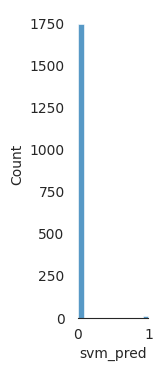

Skewness: 0.000000
Kurtosis: 0.000000


In [58]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(1, 4))
sns.histplot(test_pred['svm_pred'])
ax.xaxis.grid(False)

sns.despine(trim=True, left=True)
plt.show()

print("Skewness: %f" % test_pred['Voting_pred'].skew())
print("Kurtosis: %f" % test_pred['Voting_pred'].kurt())

In [59]:
submission=test_pred[['Patient ID','svm_pred']]
submission=submission.rename(columns={'svm_pred':'Heart Attack Risk'})
submission

,Patient ID,Heart Attack Risk
0,BMW7812,0
1,XXM0972,0
2,RQX1211,0
3,RVN4963,0
4,NCU1956,0
...,...,...
1748,GQZ5013,0
1749,FDK8693,0
1750,SVO4635,0
1751,KQR8949,0


In [60]:
submission.to_csv('submission.csv', index=False)

**I'm a beginner in the python world, not in undergrad or for work,just interest, and I'm still learning a lot of different ways to do it. I hope you'll give me your vote as well as comments to help me improve in the future, thanks!    Mr.Tao**